### Aisya Mufidah Najwa/1206230026/DS-03-01

## 1. Pemahaman Masalah (Problem Understanding)
Pertanyaan Kunci: Bagaimana kita dapat memprediksi apakah pinjaman seseorang akan disetujui berdasarkan karakteristik pemohon dan pinjaman yang diajukan?
Metrik Utama: Akurasi, Precision, Recall, dan F1-score.

## 2. Pengumpulan Data (Data Collection)
Dataset telah disediakan dalam file CSV yang berisi informasi tentang karakteristik pemohon pinjaman, riwayat kredit, dan status persetujuan pinjaman.

In [5]:
# mengimpor library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [6]:
df = pd.read_csv('loan_data.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## 3. Eksplorasi Data (Data Exploration)
Memeriksa distribusi variabel numerik (ApplicantIncome, LoanAmount, dll.) dan kategorikal (Gender, Married, dll.).
Menghitung statistik deskriptif untuk memahami karakteristik data.
Visualisasi distribusi status pinjaman dan hubungan antara variabel prediktor dengan status pinjaman.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Data loan memiliki rentang nilai yang besar dan perbedaan skala yang besar

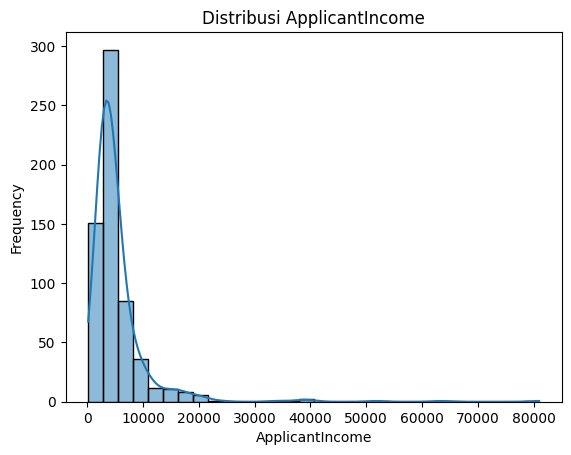

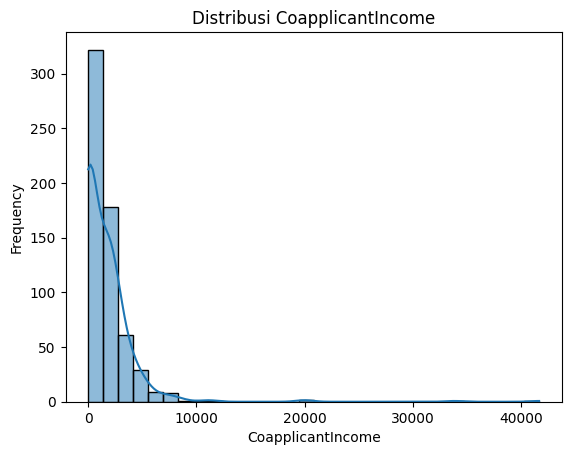

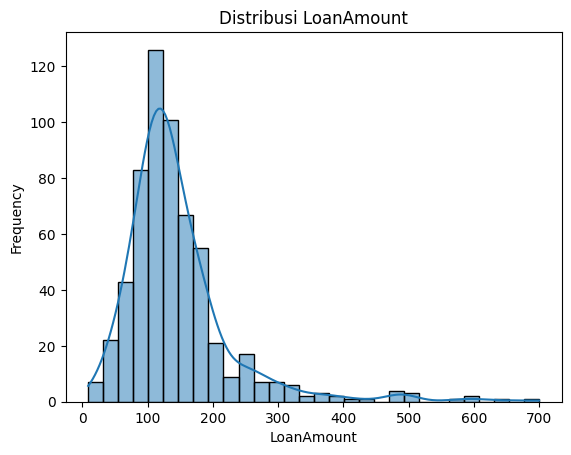

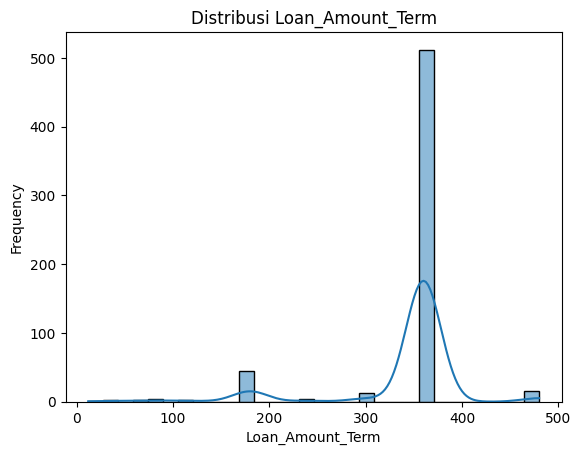

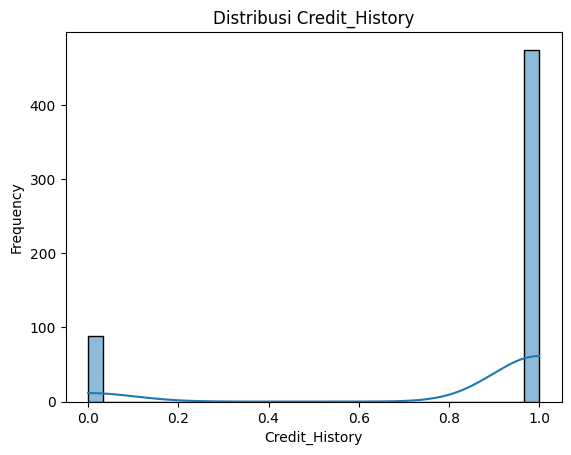

In [9]:
columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

for col in columns:
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

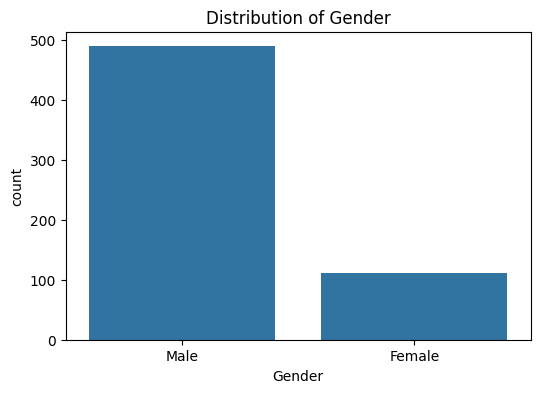

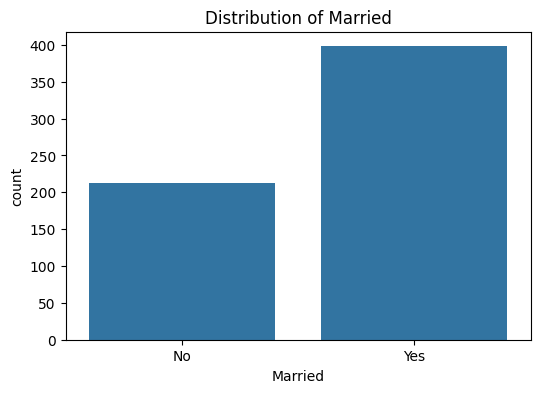

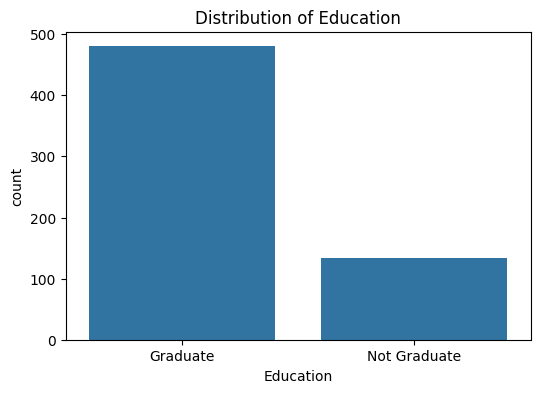

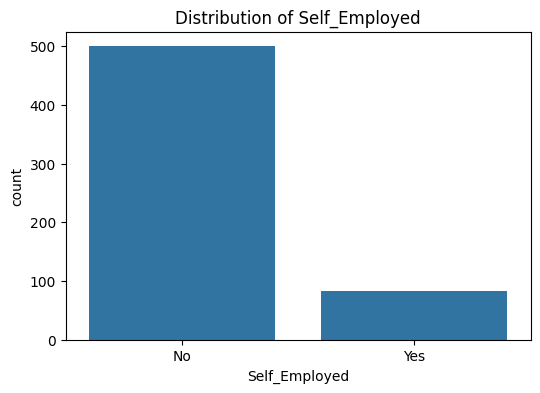

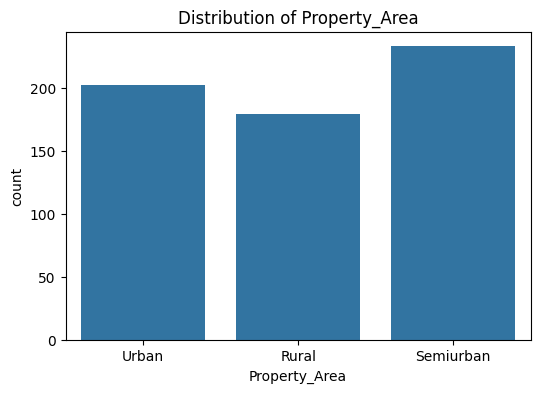

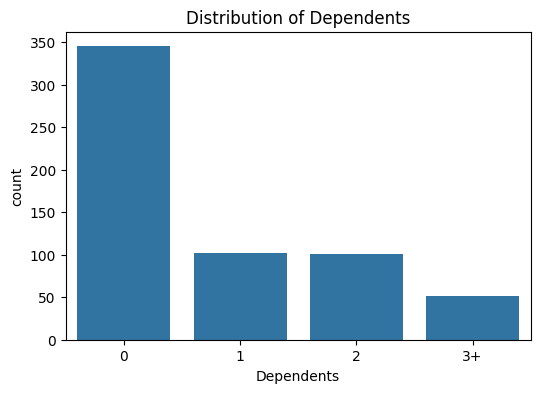

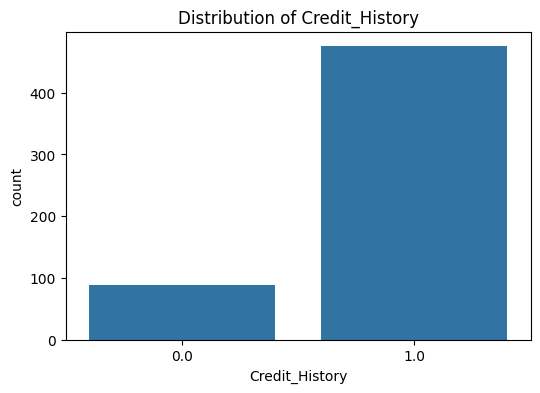

In [10]:
categorical = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents', 'Credit_History']

for col in categorical:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

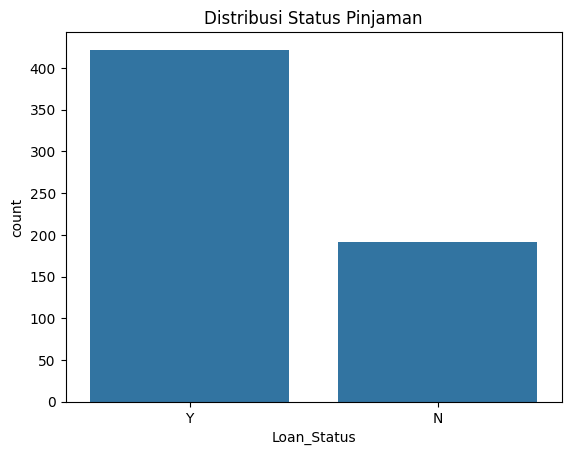

In [11]:
sns.countplot(x='Loan_Status', data=df)
plt.title('Distribusi Status Pinjaman')
plt.show()

Banyak pemohon yang disetujui peminjamannya

### Variabel Kategorikal
distribusi status pinjaman dan hubungan antara variabel prediktor dengan status pinjaman

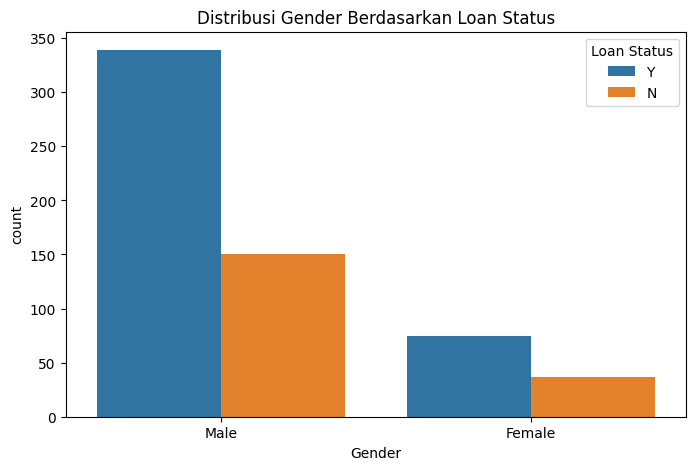

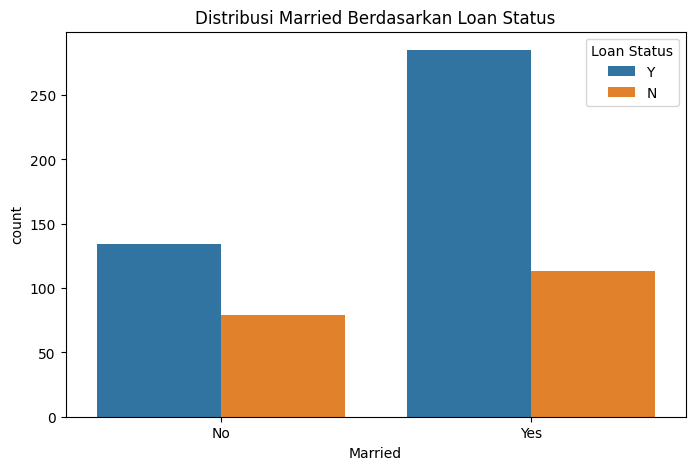

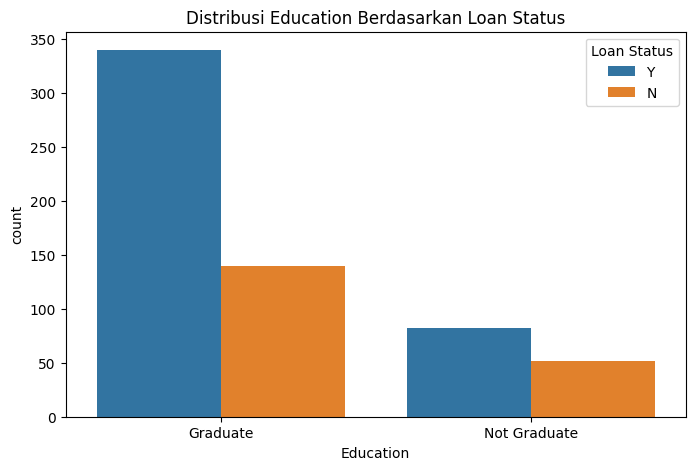

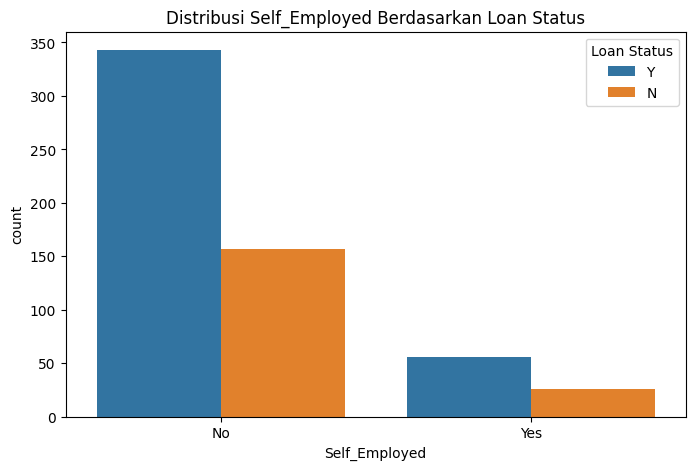

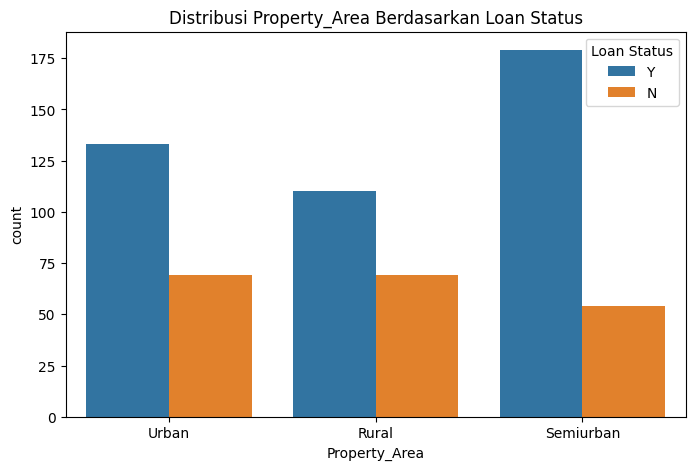

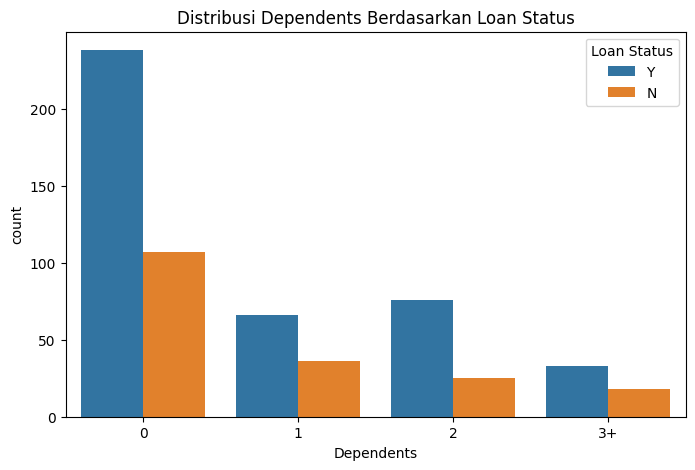

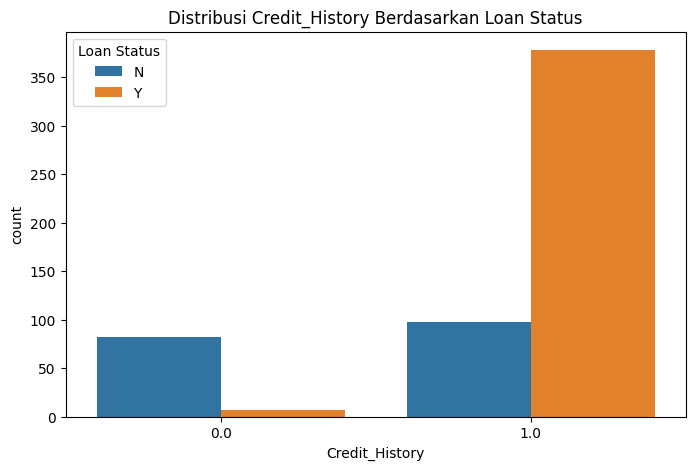

In [12]:
for col in categorical:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='Loan_Status', data=df)
    plt.title(f'Distribusi {col} Berdasarkan Loan Status')
    plt.legend(title='Loan Status')
    plt.show()

Credit History saya masukkan kategori karena hanya berisi 0 dan 1,
 
-1 artinya pemohon memiliki riwayat kredit yang baik atau memenuhi syarat

-0 berarti pemohon memiliki riwayat kredit yang buruk atau bermasalah, seperti yang bisa dilihat di grafik, 0 cenderung lebih banyak ditolak karena dianggap lebih berisiko. 

### Variabel Numerik
distribusi status pinjaman dan hubungan antara variabel prediktor dengan status pinjaman

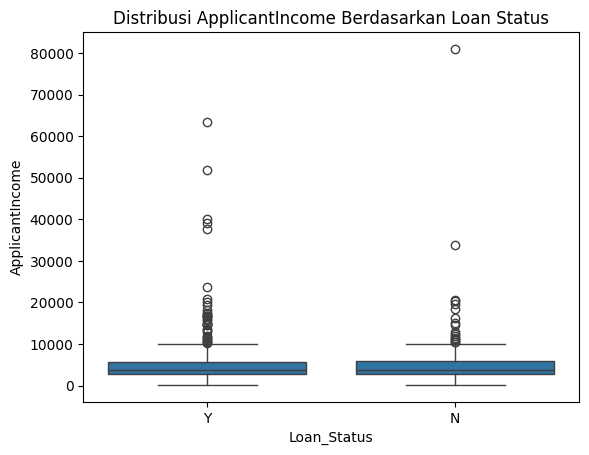

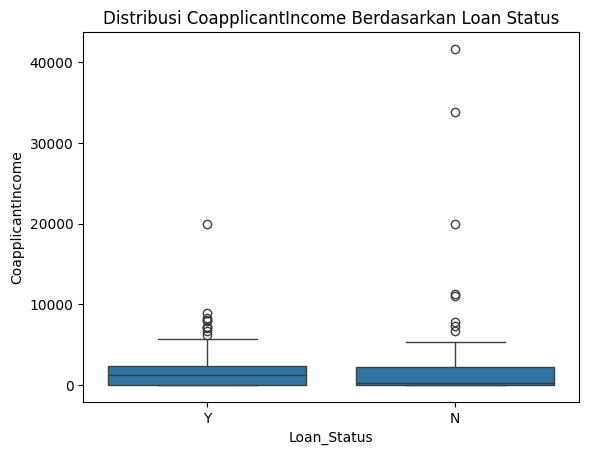

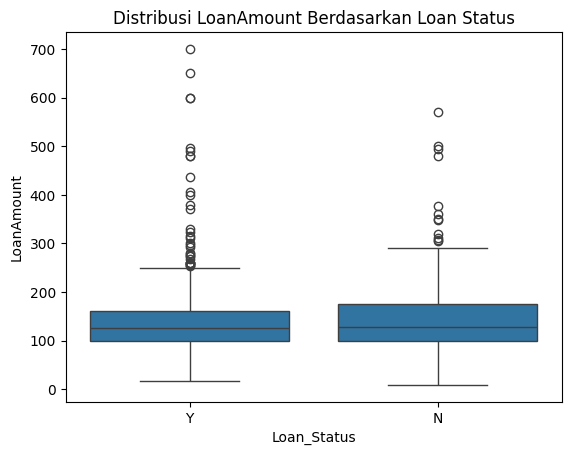

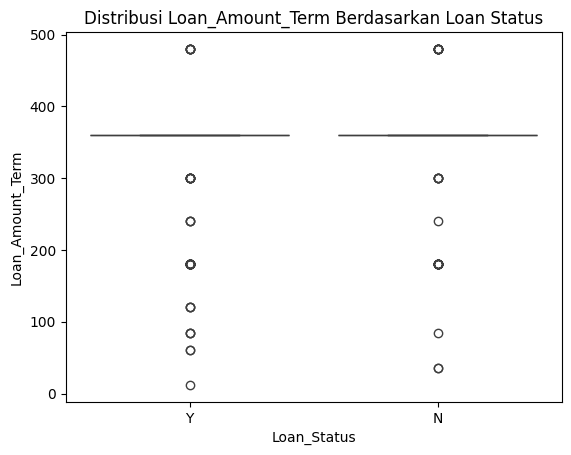

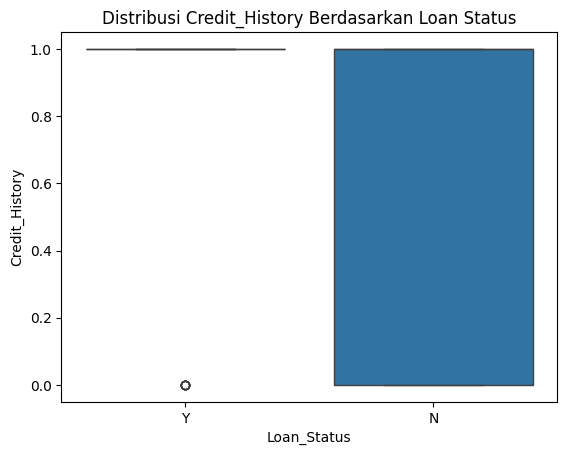

In [13]:
for col in columns:
    sns.boxplot(x='Loan_Status', y=col, data=df)
    plt.title(f'Distribusi {col} Berdasarkan Loan Status')
    plt.show()

Banyak sekali outlier, tapi ini variasi nyata dari kondisi sebenarnya.

## 4. Persiapan Data (Data Preparation)
Menangani data yang hilang (missing values) dan melakukan pengkodean (encoding) variabel kategorikal.
Normalisasi atau standarisasi variabel numerik jika diperlukan.
Pembagian data menjadi training set dan test set untuk membangun model dan mengevaluasi performanya pada data yang tidak terlihat.

In [14]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

mengisi kolom numerik dengan median agar tidak terpengaruh outlier

In [15]:
df.fillna(df.median(numeric_only=True), inplace=True)

Mengisi Gender, Self_Employed, dan Dependents dengan modus, yang paling banyak muncul.

In [16]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9340\2004109700.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9340\2004109700.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [17]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

pengkodean (encoding) variabel kategorikal menggunakan One-Hot Encoding, untuk menghindari hubungan ordinal antar kategori:

In [18]:
df_encoded = pd.get_dummies(df, columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents'], drop_first=True)
df_encoded.head(10)

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+
0,LP001002,5849,0.0,128.0,360.0,1.0,Y,True,False,False,False,False,True,False,False,False
1,LP001003,4583,1508.0,128.0,360.0,1.0,N,True,True,False,False,False,False,True,False,False
2,LP001005,3000,0.0,66.0,360.0,1.0,Y,True,True,False,True,False,True,False,False,False
3,LP001006,2583,2358.0,120.0,360.0,1.0,Y,True,True,True,False,False,True,False,False,False
4,LP001008,6000,0.0,141.0,360.0,1.0,Y,True,False,False,False,False,True,False,False,False
5,LP001011,5417,4196.0,267.0,360.0,1.0,Y,True,True,False,True,False,True,False,True,False
6,LP001013,2333,1516.0,95.0,360.0,1.0,Y,True,True,True,False,False,True,False,False,False
7,LP001014,3036,2504.0,158.0,360.0,0.0,N,True,True,False,False,True,False,False,False,True
8,LP001018,4006,1526.0,168.0,360.0,1.0,Y,True,True,False,False,False,True,False,True,False
9,LP001020,12841,10968.0,349.0,360.0,1.0,N,True,True,False,False,True,False,True,False,False


Cek distribusi normal:

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9340\1047817239.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


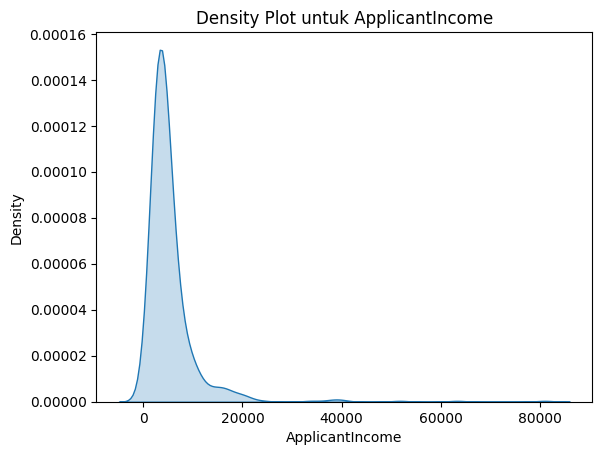

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9340\1047817239.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


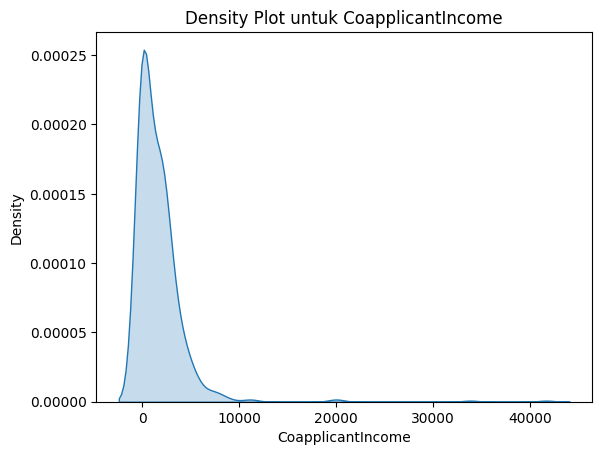

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9340\1047817239.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


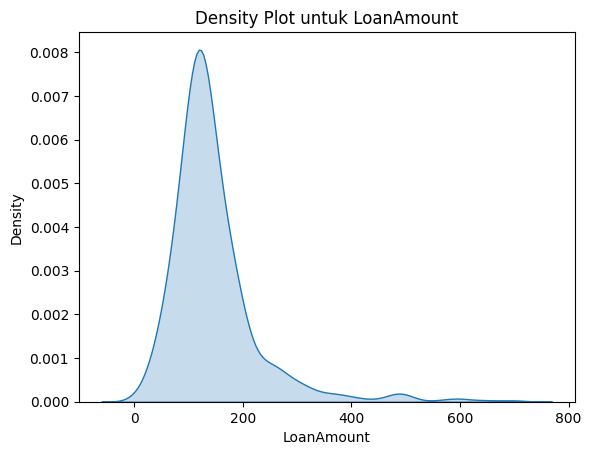

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9340\1047817239.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


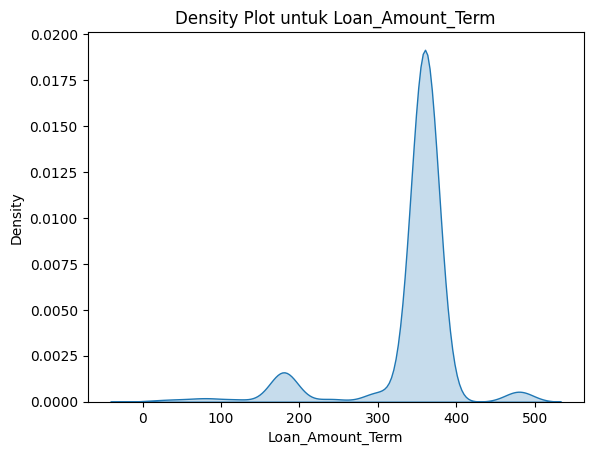

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9340\1047817239.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


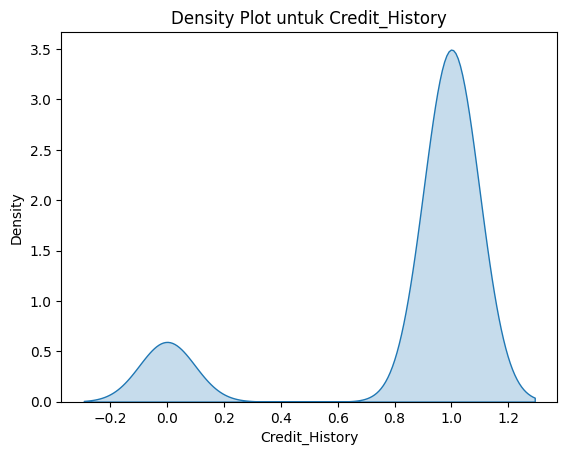

In [19]:
for col in columns:
    sns.kdeplot(df[col], shade=True)
    plt.title(f'Density Plot untuk {col}')
    plt.show()

Karena distribusi tidak normal, dan perbedaan skala besar (diawal), maka akan dilakukan normalisasi

In [20]:
scaler = MinMaxScaler()

# Melakukan normalisasi
df_encoded[columns] = scaler.fit_transform(df_encoded[columns])
df_encoded

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+
0,LP001002,0.070489,0.000000,0.172214,0.743590,1.0,Y,True,False,False,False,False,True,False,False,False
1,LP001003,0.054830,0.036192,0.172214,0.743590,1.0,N,True,True,False,False,False,False,True,False,False
2,LP001005,0.035250,0.000000,0.082489,0.743590,1.0,Y,True,True,False,True,False,True,False,False,False
3,LP001006,0.030093,0.056592,0.160637,0.743590,1.0,Y,True,True,True,False,False,True,False,False,False
4,LP001008,0.072356,0.000000,0.191027,0.743590,1.0,Y,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.034014,0.000000,0.089725,0.743590,1.0,Y,False,False,False,False,False,False,False,False,False
610,LP002979,0.048930,0.000000,0.044863,0.358974,1.0,Y,True,True,False,False,False,False,False,False,True
611,LP002983,0.097984,0.005760,0.353111,0.743590,1.0,Y,True,True,False,False,False,True,True,False,False
612,LP002984,0.091936,0.000000,0.257598,0.743590,1.0,Y,True,True,False,False,False,True,False,True,False


In [21]:
df_encoded.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.064978,0.038910,0.197905,0.706005,0.855049
std,0.075560,0.070229,0.121718,0.137668,0.352339
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.033735,0.000000,0.132055,0.743590,1.000000
50%,0.045300,0.028524,0.172214,0.743590,1.000000
75%,0.069821,0.055134,0.225398,0.743590,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


## 5. Pemodelan (Modeling)
Membangun model klasifikasi seperti Logistic Regression, Decision Tree, atau Random Forest.
Melatih model pada training set.
Memprediksi status pinjaman pada test set.

saya membagi 70% untuk training dan 30% untuk testing, 

menggunakan 0.3 memberikan lebih banyak data untuk pengujian, sehingga hasil evaluasi lebih dapat diandalkan dan mencerminkan kemampuan model dengan lebih baik, dan menghindari overfitting (kondisi di mana model terlalu fokus pada data pelatihan, sehingga kehilangan kemampuan untuk memprediksi dengan baik pada data yang baru). 

saya sudah mencoba menggunakan 20% untuk testing, tapi evaluasi menunjukkan hasil lebih baik di 30% heheh

In [22]:
# Memisahkan variabel independen dan dependen
X = df_encoded.drop(columns=['Loan_ID', 'Loan_Status'])  # Menghapus Loan_ID dan Loan_Status menyisakan fitur untuk memprediksi loan status
y = df_encoded['Loan_Status']

# Mengubah variabel target menjadi 0 dan 1 (jika diperlukan)
y = y.map({'Y': 1, 'N': 0})

# Membagi data menjadi training dan test set (70% untuk training, 30% untuk testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
# fungsi confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Rejected', 'Approved'], 
                yticklabels=['Rejected', 'Approved'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix untuk {model_name}')
    plt.show()

## 6. Evaluasi Model (Model Evaluation)
Mengukur performa model menggunakan akurasi, precision, recall, dan F1-score.
Membuat confusion matrix untuk mengevaluasi hasil prediksi.

keterangan: yang KNN, Naive Bayes, & SVM ada di bawahnya Logistic Regression, Decision Tree, & Random Forest, karena ini dikerjakan sebelum soal diganti

In [24]:
from sklearn.linear_model import LogisticRegression

# Membuat dan melatih model Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Evaluasi Model: Logistic Regression
Akurasi: 0.78
Precision: 0.76
Recall: 0.98
F1-score: 0.86

Confusion Matrix:


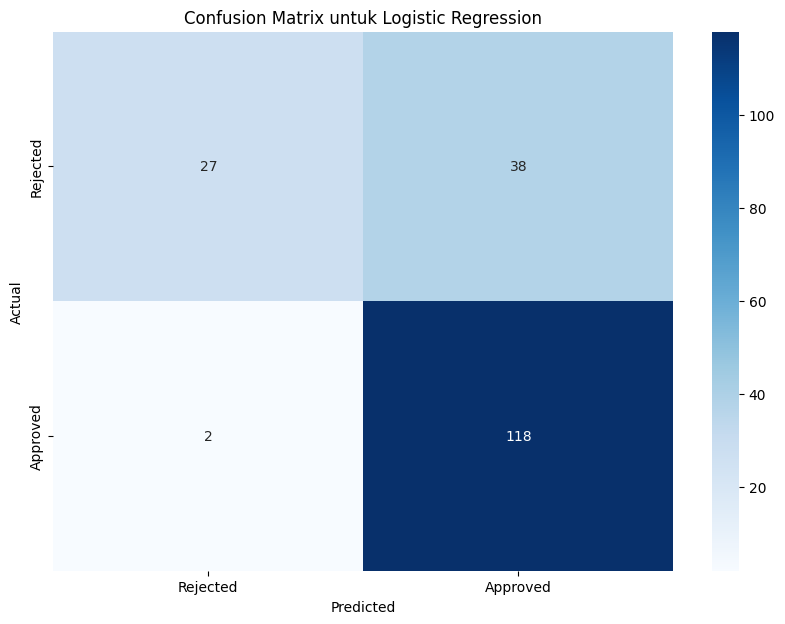

In [25]:
# Memprediksi status pinjaman pada test set
log_predictions = log_model.predict(X_test)

# Mengukur performa model
print("Evaluasi Model: Logistic Regression")
print(f"Akurasi: {accuracy_score(y_test, log_predictions):.2f}")
print(f"Precision: {precision_score(y_test, log_predictions):.2f}")
print(f"Recall: {recall_score(y_test, log_predictions):.2f}")
print(f"F1-score: {f1_score(y_test, log_predictions):.2f}")
print("\nConfusion Matrix:")
plot_confusion_matrix(y_test, log_predictions, 'Logistic Regression')

True Positives (TP): 14,
Model memprediksi 14 pemohon pinjaman layak, dan mereka benar-benar disetujui.

True Negatives (TN): 79,
Model memprediksi 79 pemohon pinjaman tidak layak, dan mereka benar-benar ditolak.

False Positives (FP): 1,
Model memprediksi 1 pemohon pinjaman layak, tetapi sebenarnya ditolak.

False Negatives (FN): 21,
Model memprediksi 21 pemohon pinjaman tidak layak, padahal mereka seharusnya disetujui.

In [26]:
from sklearn.tree import DecisionTreeClassifier

# Membuat dan melatih model Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Evaluasi Model: Decision Tree
Akurasi: 0.66
Precision: 0.73
Recall: 0.77
F1-score: 0.75

Confusion Matrix:


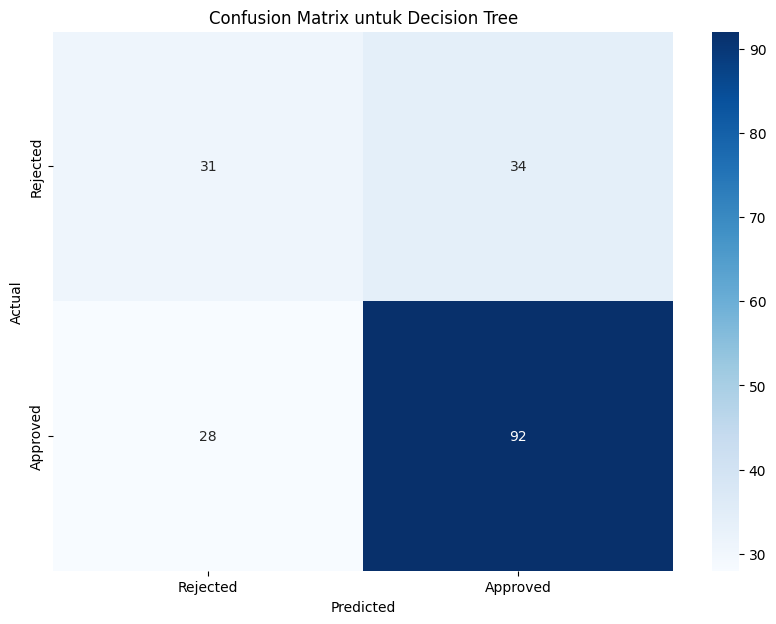

In [27]:
# Memprediksi status pinjaman pada test set
dt_predictions = dt_model.predict(X_test)

# Mengukur performa model
print("Evaluasi Model: Decision Tree")
print(f"Akurasi: {accuracy_score(y_test, dt_predictions):.2f}")
print(f"Precision: {precision_score(y_test, dt_predictions):.2f}")
print(f"Recall: {recall_score(y_test, dt_predictions):.2f}")
print(f"F1-score: {f1_score(y_test, dt_predictions):.2f}")
print("\nConfusion Matrix:")
plot_confusion_matrix(y_test, dt_predictions, 'Decision Tree')

True Positives (TP): 20,
Model memprediksi 20 pemohon pinjaman layak, dan mereka benar-benar disetujui.

True Negatives (TN): 68,
Model memprediksi 68 pemohon pinjaman tidak layak, dan mereka benar-benar ditolak.

False Positives (FP): 12,
Model memprediksi 12 pemohon pinjaman layak, tetapi sebenarnya ditolak.

False Negatives (FN): 15,
Model memprediksi 15 pemohon pinjaman tidak layak, padahal mereka seharusnya disetujui.

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Membuat dan melatih model Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Evaluasi Model: Random Forest
Akurasi: 0.76
Precision: 0.76
Recall: 0.93
F1-score: 0.84

Confusion Matrix:


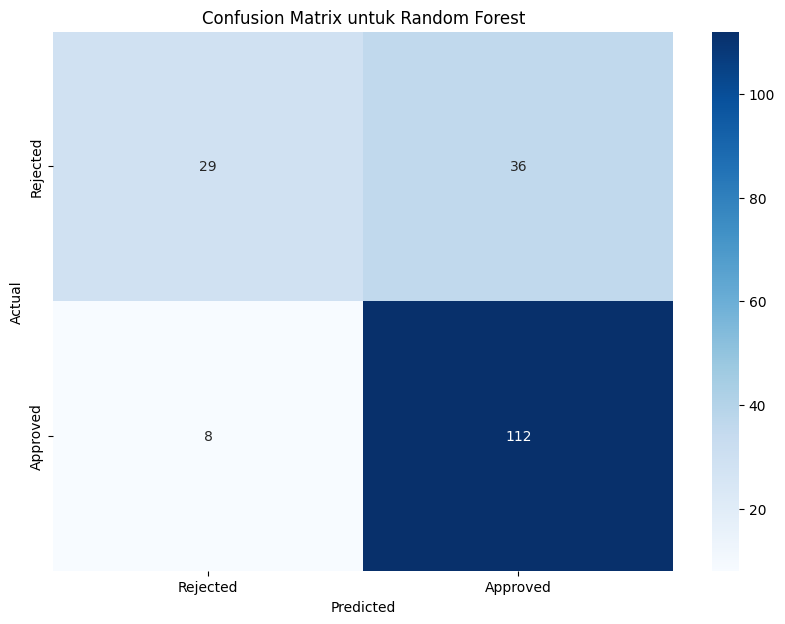

In [29]:
# Memprediksi status pinjaman pada test set
rf_predictions = rf_model.predict(X_test)

# Mengukur performa model
print("Evaluasi Model: Random Forest")
print(f"Akurasi: {accuracy_score(y_test, rf_predictions):.2f}")
print(f"Precision: {precision_score(y_test, rf_predictions):.2f}")
print(f"Recall: {recall_score(y_test, rf_predictions):.2f}")
print(f"F1-score: {f1_score(y_test, rf_predictions):.2f}")
print("\nConfusion Matrix:")
plot_confusion_matrix(y_test, rf_predictions, 'Random Forest')

True Positives (TP): 16 - Model memprediksi 16 pemohon pinjaman layak, dan mereka benar-benar disetujui.

True Negatives (TN): 79 - Model memprediksi 79 pemohon pinjaman tidak layak, dan mereka benar-benar ditolak.

False Positives (FP): 1 - Model memprediksi 1 pemohon pinjaman layak, tetapi sebenarnya ditolak.

False Negatives (FN): 19 - Model memprediksi 19 pemohon pinjaman tidak layak, padahal mereka seharusnya disetujui.

### Kesimpulan

Model Random Forest adalah model yang paling baik di antara ketiga model yang dievaluasi

Akurasi: 83% - Model berhasil mengklasifikasikan 83% dari semua prediksi dengan benar.

Precision: 81% - Dari semua prediksi pinjaman yang disetujui, 81% benar-benar layak.

Recall: 99% - Model berhasil mendeteksi 99% pemohon pinjaman yang sebenarnya layak.

F1-score: 89% - Menggambarkan keseimbangan yang baik antara precision dan recall.


 Ini menunjukkan keseimbangan yang baik antara kemampuan model dalam mengidentifikasi pemohon pinjaman yang layak dan meminimalkan kesalahan prediksi. Logistic Regression juga menunjukkan performa yang baik, sementara Decision Tree memiliki performa terendah di antara ketiga model.

# REVISI 
setelah revisi soal

Menggunakan model KNN, Naive Bayes, & SVM.

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Saya jadikan fungsi saja, fungsi evaluasi yang juga memanggil fungsi confusion matrix diatas tadi.

In [31]:
def evaluate_model(model, model_name):
    predictions = model.predict(X_test)
    print(f"Evaluasi Model: {model_name}")
    print(f"Akurasi: {accuracy_score(y_test, predictions):.2f}")
    print(f"Precision: {precision_score(y_test, predictions):.2f}")
    print(f"Recall: {recall_score(y_test, predictions):.2f}")
    print(f"F1-score: {f1_score(y_test, predictions):.2f}")
    print("Confusion Matrix:")
    plot_confusion_matrix(y_test, predictions, model_name)
    print("\n")

Evaluasi Model: K-Nearest Neighbors
Akurasi: 0.70
Precision: 0.72
Recall: 0.89
F1-score: 0.80
Confusion Matrix:


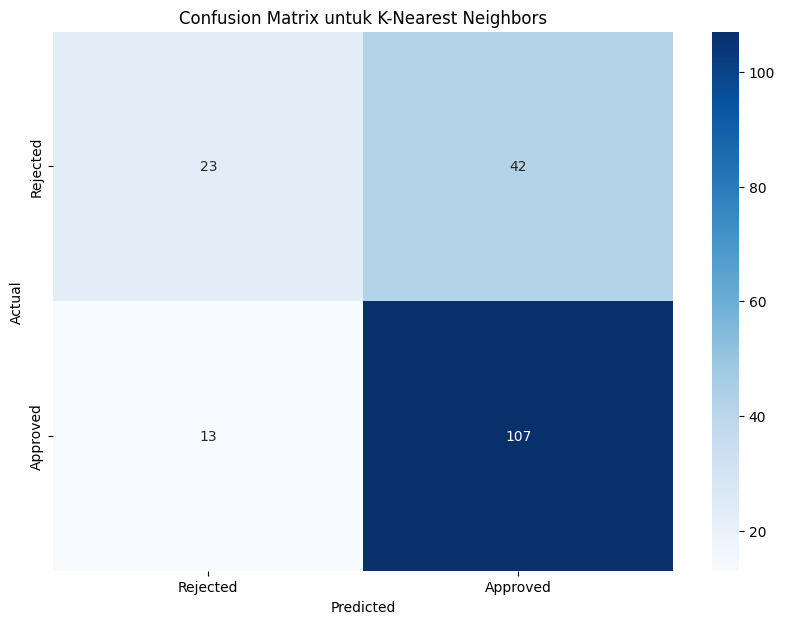

In [32]:
# 1. Model K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
evaluate_model(knn_model, "K-Nearest Neighbors")

True Positives (TP): 11 - Model memprediksi 11 pemohon pinjaman layak, dan mereka benar-benar disetujui.

True Negatives (TN): 76 - Model memprediksi 76 pemohon pinjaman tidak layak, dan mereka benar-benar ditolak.

False Positives (FP): 4 - Model memprediksi 4 pemohon pinjaman layak, tetapi sebenarnya ditolak.

False Negatives (FN): 24 - Model memprediksi 24 pemohon pinjaman tidak layak, padahal mereka seharusnya disetujui.

Evaluasi Model: Naive Bayes
Akurasi: 0.78
Precision: 0.76
Recall: 0.97
F1-score: 0.85
Confusion Matrix:


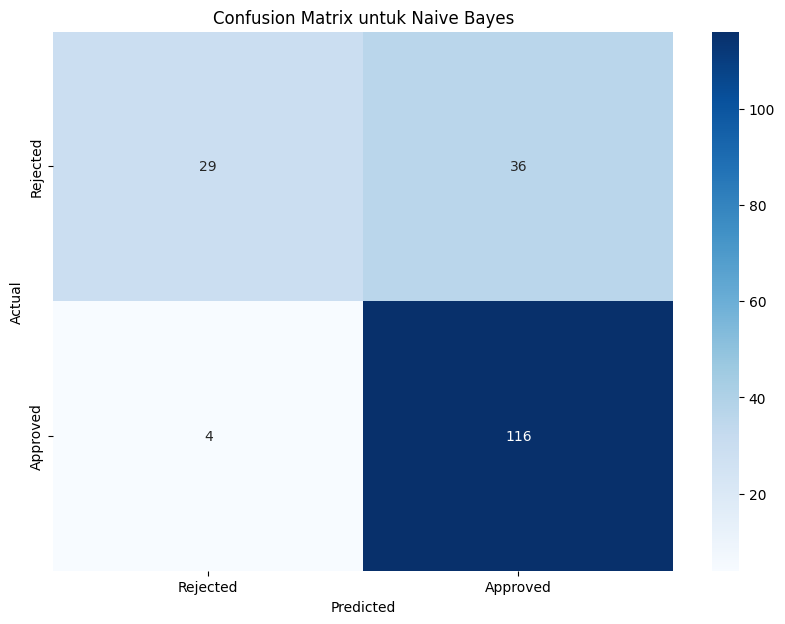

In [33]:
# 2. Model Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
evaluate_model(nb_model, "Naive Bayes")

True Positives (TP): 14 - Model memprediksi 14 pemohon pinjaman layak, dan mereka benar-benar disetujui.

True Negatives (TN): 79 - Model memprediksi 79 pemohon pinjaman tidak layak, dan mereka benar-benar ditolak.

False Positives (FP): 1 - Model memprediksi 1 pemohon pinjaman layak, tetapi sebenarnya ditolak.

False Negatives (FN): 21 - Model memprediksi 21 pemohon pinjaman tidak layak, padahal mereka seharusnya disetujui.

Evaluasi Model: Support Vector Machine
Akurasi: 0.78
Precision: 0.76
Recall: 0.98
F1-score: 0.86
Confusion Matrix:


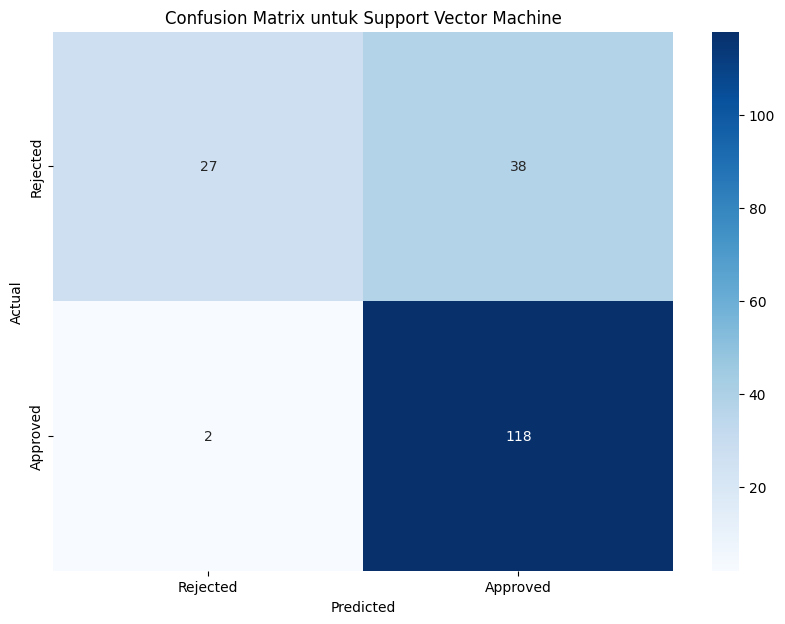

In [34]:
# 3. Model Support Vector Machine (SVM)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
evaluate_model(svm_model, "Support Vector Machine")

True Positives (TP): 14 - Model memprediksi 14 pemohon pinjaman layak, dan mereka benar-benar disetujui.

True Negatives (TN): 79 - Model memprediksi 79 pemohon pinjaman tidak layak, dan mereka benar-benar ditolak.

False Positives (FP): 1 - Model memprediksi 1 pemohon pinjaman layak, tetapi sebenarnya ditolak.

False Negatives (FN): 21 - Model memprediksi 21 pemohon pinjaman tidak layak, padahal mereka seharusnya disetujui.

### Kesimpulan

Model Naive Bayes dan Support Vector Machine memiliki performa yang paling dari ketiga model yang dievaluasi

Akurasi: 81% - Model berhasil mengklasifikasikan 81% dari semua prediksi dengan benar.

Precision: 79% - Dari semua prediksi pinjaman yang disetujui, 79% benar-benar layak.

Recall: 99% - Model mendeteksi hampir semua pemohon yang benar-benar layak disetujui.

F1-score: 88% - Menggambarkan keseimbangan yang baik antara precision dan recall.

Secara keseluruhan, Naive Bayes dan SVM memiliki performa terbaik dalam klasifikasi ini dengan nilai metrik yang sama, terutama karena recall dan F1-score yang tinggi. KNN berada lebih rendah karena lebih sensitif terhadap struktur data dan cenderung kurang optimal dibandingkan kedua model lain pada dataset ini.

### Terima kasih